# Problem Statement 1

Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:

a. Import the Necessary Packages:

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

 b. Load the Training and Testing Data:

In [31]:
# Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

c. Define the Network Architecture Using Keras:

In [32]:
model = Sequential()
model.add(Dense(512, input_shape=(28*28,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

d. Train the Model Using Stochastic Gradient Descent (SGD):

In [33]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
469/469 [==============================] - 7s 12ms/step - loss: 1.0576 - accuracy: 0.7599 - val_loss: 0.5092 - val_accuracy: 0.8755
Epoch 2/11
469/469 [==============================] - 6s 12ms/step - loss: 0.4426 - accuracy: 0.8838 - val_loss: 0.3651 - val_accuracy: 0.9026
Epoch 3/11
469/469 [==============================] - 5s 11ms/step - loss: 0.3551 - accuracy: 0.9012 - val_loss: 0.3136 - val_accuracy: 0.9129
Epoch 4/11
469/469 [==============================] - 5s 11ms/step - loss: 0.3150 - accuracy: 0.9110 - val_loss: 0.2865 - val_accuracy: 0.9180
Epoch 5/11
469/469 [==============================] - 7s 15ms/step - loss: 0.2891 - accuracy: 0.9180 - val_loss: 0.2670 - val_accuracy: 0.9250
Epoch 6/11
469/469 [==============================] - 6s 12ms/step - loss: 0.2693 - accuracy: 0.9232 - val_loss: 0.2525 - val_accuracy: 0.9291
Epoch 7/11
469/469 [==============================] - 6s 13ms/step - loss: 0.2534 - accuracy: 0.9279 - val_loss: 0.2375 - val_accuracy: 0.9314

e. Evaluate the Network:

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19888146221637726
Test accuracy: 0.9426000118255615


313/313 [==============================] - 1s 3ms/step
Actual Number:  9
Predicted Number:  9


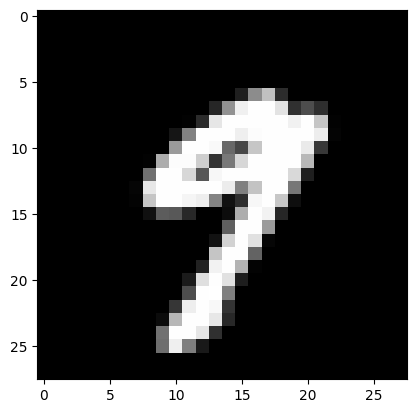

In [35]:
n = 20
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

f. Plot the Training Loss and Accuracy:

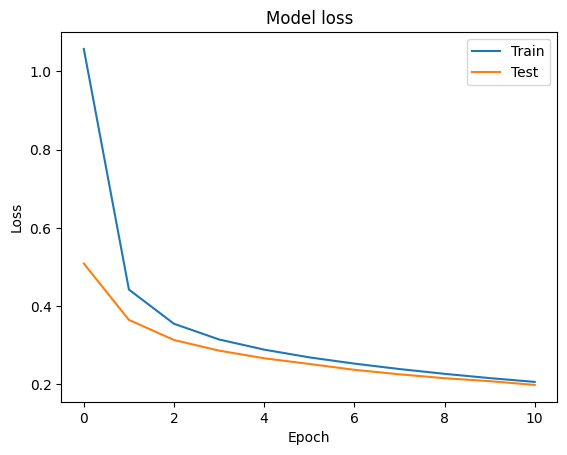

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

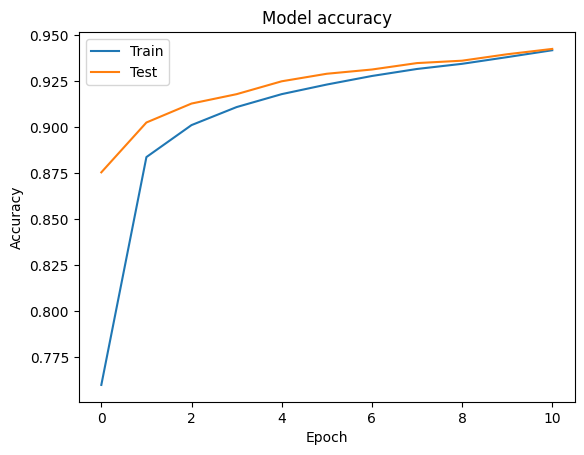

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()